<a href="https://colab.research.google.com/github/snimale/ML-Learning/blob/master/DataPreprocessingPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Dataset from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/drive/My Drive/Datasets/Car Price Prediction/train-data.csv')

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Exploratory Data Analysis

In [ ]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


we drop the duplicate indexing column

In [ ]:
df.drop(columns=[df.columns[0]], inplace=True)
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


#### Stats

In [ ]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [ ]:
print(df.mean())
print(df.mode())
print(df.median())

Year                  2013.358199
Kilometers_Driven    58738.380296
Seats                    5.278735
Price                    9.479468
dtype: float64
                     Name Location    Year  Kilometers_Driven Fuel_Type  \
0  Mahindra XUV500 W8 2WD   Mumbai  2014.0            60000.0    Diesel   
1                     NaN      NaN     NaN                NaN       NaN   
2                     NaN      NaN     NaN                NaN       NaN   

  Transmission Owner_Type    Mileage   Engine   Power  Seats   New_Price  \
0       Manual      First  17.0 kmpl  1197 CC  74 bhp    5.0   4.78 Lakh   
1          NaN        NaN  18.9 kmpl      NaN     NaN    NaN  63.71 Lakh   
2          NaN        NaN        NaN      NaN     NaN    NaN  95.13 Lakh   

   Price  
0    4.5  
1    NaN  
2    NaN  
Year                  2014.00
Kilometers_Driven    53000.00
Seats                    5.00
Price                    5.64
dtype: float64


<ipython-input-8-9811b4e58454>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-8-9811b4e58454>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


#### Drawing Some Graphs

<Axes: xlabel='Seats', ylabel='Price'>

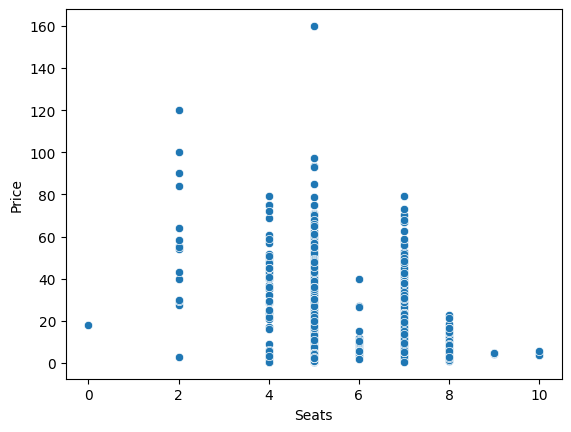

In [ ]:
sns.scatterplot(x='Seats', y='Price', data=df)

we find that 2 and 5 seater cars reach crores in price

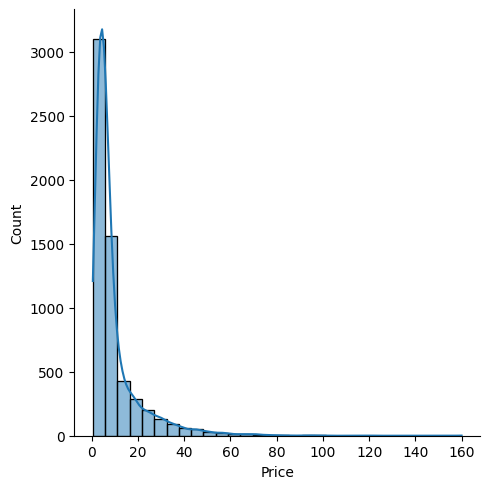

In [ ]:
sns.displot(df['Price'], kde=True, bins=30)

positively skewed distribution

# Handling Missing Values & Converting units/types

#### Working on New Price Column

In [ ]:
df.drop(index=(df.loc[df['New_Price'].isnull()]).index, inplace=True)
df = df.reset_index(drop=True)
df.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00


Removing Lakh and Cr suffix from the new price column

In [ ]:
for i in range(0, df['New_Price'].size):
  curr = df.iloc[i, 11].split()
  if(curr[1]=="Lakh"):
    df.iloc[i, 11] = float(curr[0])
  else:
    df.iloc[i, 11] = float(curr[0]) * 100

In [ ]:
df['New_Price'] = df['New_Price'].astype(float)
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87,18.55


#### Working on some other columns

check for null in price column

In [ ]:
df.loc[df['Price'].isnull()] #none of price is null for new df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


check for null in seats

In [ ]:
df.loc[df['Seats'].isnull()] # none of the seats is null for new df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


check for null year

In [ ]:
df['Year'].isnull().sum()

0

check for null for rest

In [ ]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              1
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

#### Working on power column

checking null for power column

In [ ]:
df.loc[df['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


changing units to value in power column

In [ ]:
# make sure all data have same unit of power used
# df.loc[df['Power'].str.contains('bhp')].count()

for i in range(0, df['Power'].size):
  df.iloc[i, 9] = float(df.iloc[i, 9].split()[0])

test if unit changed

In [ ]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25,5.0,10.65,9.95


#### Working on Engine Column

check for null

In [ ]:
df['Engine'].isnull().sum()

0

check if all have same units and remove if they have

In [ ]:
df.loc[df['Engine'].str.contains('CC')].count()

Name                 824
Location             824
Year                 824
Kilometers_Driven    824
Fuel_Type            824
Transmission         824
Owner_Type           824
Mileage              823
Engine               824
Power                824
Seats                824
New_Price            824
Price                824
dtype: int64

remove cc unit

In [ ]:
for i in range(0, df['Engine'].size):
  df.iloc[i, 8] = float(df.iloc[i, 8].split()[0])

check if cc removed

In [ ]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.7,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755.0,171.5,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462.0,103.25,5.0,10.65,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477.0,175.56,7.0,32.01,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995.0,190.0,5.0,47.87,18.55


#### Working on milage column

In [ ]:
df.drop(index=df.loc[df['Mileage'].isnull()].index, inplace=True)

remove units

In [ ]:
for i in range(0, df['Mileage'].size):
  curr = df.iloc[i, 7].split()
  if curr[1]=="kmpl":
    df.iloc[i, 7] = float(curr[0])
  else:
     df.iloc[i, 7] = float(curr[0])*1.40

In [ ]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.7,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.5,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65,9.95


# Handling outliners

Remove outliners for price column

In [ ]:
df = df.loc[(abs((df['Price']-df['Price'].mean())/df['Price'].std())<=3)]
df.reset_index(drop=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.7,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.5,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5,2477.0,175.56,7.0,32.01,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.0,5.0,47.87,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57,1193.0,88.7,5.0,7.77,4.00
797,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598.0,103.5,5.0,11.91,3.25
798,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3,1248.0,88.5,5.0,9.93,7.43
799,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5,1198.0,86.8,5.0,6.63,3.20


remove outliners for new price column

In [ ]:
df = df.loc[(abs((df['New_Price']-df['New_Price'].mean())/df['New_Price'].std())<=3)]
df.reset_index(drop=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.7,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.5,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5,2477.0,175.56,7.0,32.01,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.0,5.0,47.87,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57,1193.0,88.7,5.0,7.77,4.00
784,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598.0,103.5,5.0,11.91,3.25
785,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3,1248.0,88.5,5.0,9.93,7.43
786,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5,1198.0,86.8,5.0,6.63,3.20


removing outliners for rest of them

In [ ]:
df = df.loc[(abs((df['Mileage']-df['Mileage'].mean())/df['Mileage'].std())<=3) | (abs((df['Engine']-df['Engine'].mean())/df['Engine'].std())<=3) | (abs((df['Power']-df['Power'].mean())/df['Power'].std())<=3) | (abs((df['Seats']-df['Seats'].mean())/df['Seats'].std())<=3)]
df.reset_index(drop=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.7,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.5,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5,2477.0,175.56,7.0,32.01,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.0,5.0,47.87,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57,1193.0,88.7,5.0,7.77,4.00
784,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598.0,103.5,5.0,11.91,3.25
785,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3,1248.0,88.5,5.0,9.93,7.43
786,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5,1198.0,86.8,5.0,6.63,3.20


In [ ]:
df = df.loc[(abs((df['Year']-df['Year'].mean())/df['Year'].std())<=3) | (abs((df['Kilometers_Driven']-df['Kilometers_Driven'].mean())/df['Kilometers_Driven'].std())<=3)]
df.reset_index(drop=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.7,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.5,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5,2477.0,175.56,7.0,32.01,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.0,5.0,47.87,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57,1193.0,88.7,5.0,7.77,4.00
781,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598.0,103.5,5.0,11.91,3.25
782,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3,1248.0,88.5,5.0,9.93,7.43
783,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5,1198.0,86.8,5.0,6.63,3.20


# Categorical encoding

encoding and storing mapping for same mapping in test data

for fuel type - {'CNG': 0, 'Diesel': 1, 'Petrol': 2}

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_col = encoder.fit_transform(df['Fuel_Type'])
df['Fuel_Type']=encoded_col
# mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
# mapping

transmission mapping - {'Automatic': 0, 'Manual': 1}

In [ ]:
encoder = LabelEncoder()
encoded_col = encoder.fit_transform(df['Transmission'])
df['Transmission']=encoded_col
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
mapping

{'Automatic': 0, 'Manual': 1}

mapping for owner type - {'First': 0, 'Second': 1, 'Third': 2}

In [ ]:
encoder = LabelEncoder()
encoded_col = encoder.fit_transform(df['Owner_Type'])
df['Owner_Type']=encoded_col
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
mapping

{'First': 0, 'Second': 1, 'Third': 2}

mapping for location - {'Ahmedabad': 0,
 'Bangalore': 1,
 'Chennai': 2,
 'Coimbatore': 3,
 'Delhi': 4,
 'Hyderabad': 5,
 'Jaipur': 6,
 'Kochi': 7,
 'Kolkata': 8,
 'Mumbai': 9,
 'Pune': 10}

In [ ]:
encoder = LabelEncoder()
encoded_col = encoder.fit_transform(df['Location'])
df['Location']=encoded_col
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
mapping

{'Ahmedabad': 0,
 'Bangalore': 1,
 'Chennai': 2,
 'Coimbatore': 3,
 'Delhi': 4,
 'Hyderabad': 5,
 'Jaipur': 6,
 'Kochi': 7,
 'Kolkata': 8,
 'Mumbai': 9,
 'Pune': 10}

dropping name as too many encoded vals in mapping

In [ ]:
df.drop(columns=['Name'], inplace=True)

In [ ]:
df.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2,2011,46000,2,1,0,18.2,1199.0,88.7,5.0,8.61,4.50
1,9,2016,36000,1,0,0,11.36,2755.0,171.5,8.0,21.00,17.50
2,7,2018,25692,2,1,0,21.56,1462.0,103.25,5.0,10.65,9.95


# Standardization & Normalization

In [ ]:
df.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2,2011,46000,2,1,0,18.2,1199.0,88.7,5.0,8.61,4.50
1,9,2016,36000,1,0,0,11.36,2755.0,171.5,8.0,21.00,17.50
2,7,2018,25692,2,1,0,21.56,1462.0,103.25,5.0,10.65,9.95


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Engine', 'Power', 'Mileage']] = pd.DataFrame(scaler.fit_transform(df[['Engine', 'Power', 'Mileage']]))

check if done

In [ ]:
df.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2,2011,46000,2,1,0,0.387597,0.096339,0.104386,5.0,8.61,4.50
1,9,2016,36000,1,0,0,0.241929,0.471098,0.346491,8.0,21.00,17.50
2,7,2018,25692,2,1,0,0.459153,0.159682,0.146930,5.0,10.65,9.95


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['New_Price', 'Price', 'Kilometers_Driven']] = pd.DataFrame(scaler.fit_transform(df[['New_Price', 'Price', 'Kilometers_Driven']]))

testing if done

In [ ]:
df.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2,2011,0.211754,2,1,0,0.387597,0.096339,0.104386,5.0,0.058743,0.049774
1,9,2016,0.165112,1,0,0,0.241929,0.471098,0.346491,8.0,0.213598,0.285068
2,7,2018,0.117034,2,1,0,0.459153,0.159682,0.146930,5.0,0.084239,0.148416
3,4,2014,0.510261,1,1,0,0.287503,0.404143,0.358363,7.0,0.351206,0.239819
4,7,2014,0.151035,1,0,0,0.483218,0.288054,0.400585,5.0,0.549431,0.304072


# Drawing some grapgh - analysis

<Axes: >

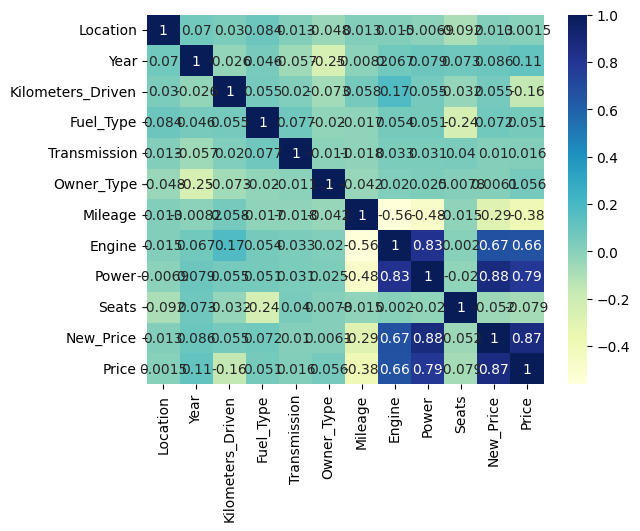

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# Feature Selection

In [ ]:
df = df[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'New_Price']]
df.drop(index=df.loc[df['Price'].isnull()].index, inplace=True)

<ipython-input-44-e02fffc968af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df.loc[df['Price'].isnull()].index, inplace=True)


In [ ]:
x = df.iloc[:, :-1].copy()
y = df['New_Price']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Assuming 'x' is your input dataframe with numerical features

# SelectKBest feature selection
ordered_rank_features = SelectKBest(score_func=f_regression, k='all')  # Select all features
ordered_feature = ordered_rank_features.fit(x, y)

# Create a DataFrame to store the scores
dfscores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
dfcolumns = pd.DataFrame(x.columns)
features_rank = pd.concat([dfcolumns, dfscores], axis=1)
features_rank.columns = ['Features', 'Score']
features_rank.sort_values('Score', ascending=False, inplace=True)

# Print the feature ranking
print(features_rank)

             Features        Score
8               Power  2543.291634
10              Price  2263.304077
7              Engine   601.493806
6             Mileage    68.557355
1                Year     5.596943
3           Fuel_Type     3.904689
2   Kilometers_Driven     2.252637
9               Seats     2.015511
0            Location     0.127993
4        Transmission     0.077101
5          Owner_Type     0.027524


dropping last 3 colns

In [ ]:
features_rank.drop(index=features_rank.loc[features_rank['Score']<1].index, inplace=True)
features_rank

,Features,Score
8,Power,2543.291634
10,Price,2263.304077
7,Engine,601.493806
6,Mileage,68.557355
1,Year,5.596943
3,Fuel_Type,3.904689
2,Kilometers_Driven,2.252637
9,Seats,2.015511


In [ ]:
df = df[features_rank['Features']]

In [ ]:
df.head()

,Power,Price,Engine,Mileage,Year,Fuel_Type,Kilometers_Driven,Seats
0,0.104386,0.049774,0.096339,0.387597,2011,2,0.211754,5.0
1,0.346491,0.285068,0.471098,0.241929,2016,1,0.165112,8.0
2,0.146930,0.148416,0.159682,0.459153,2018,2,0.117034,5.0
3,0.358363,0.239819,0.404143,0.287503,2014,1,0.510261,7.0
4,0.400585,0.304072,0.288054,0.483218,2014,1,0.151035,5.0


In [ ]:
df.to_csv('/content/drive/My Drive/Datasets/Car Price Prediction/cleaned-data.csv', index=False)